# (Effects of loan characteristics on the borrower's Annual Percentage Rate   )
## by (Kareem  Negm )

## Investigation Overview

> In this presentation we will spread some perceptions about the characteristics of loans to see how they relate to the borrower's Annual Percentage Rate we will make visualizations on some important features such as BorrowerAPR, ProsperScore,  and CreditScoreRangeUpper  
## Dataset Overview

> 
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('ProsperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)
df2 = df[df['ProsperScore'].isnull()==False]

## (BorrowerAPR values Distribution)
 Distribution is considered normal except in a specific period in which the distribution is interesting, which is the period when the value of BorrowerAPR  between0.35797% and 0.35643%.

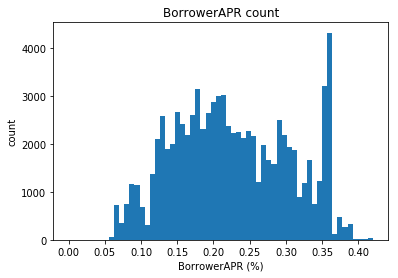

In [5]:

bins = np.arange(0, df2['BorrowerAPR'].max(), 0.007)
plt.hist(data = df2, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df2['BorrowerAPR'].max(), 0.05));

## (BorrowerAPR & ProsperScore)
 people with a higher rating tend to be more reliable and therefore get a lower interest rate for the borrower.
 That's what we figured out in the drawing below. 

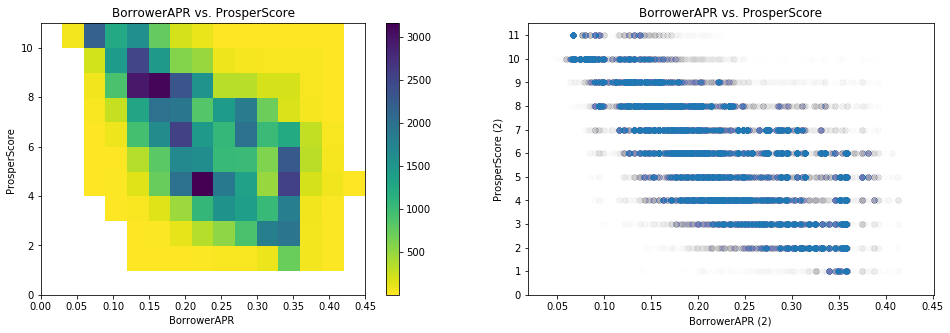

In [6]:
plt.figure(figsize = [16, 5]) 


plt.subplot(1, 2, 1)
bins_x = np.arange(0, df2['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df2['ProsperScore'].max()+1, 1)
plt.hist2d(data = df2, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR ')
plt.ylabel('ProsperScore ');


plt.subplot(1, 2, 2)
plt.scatter(data = df2, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))

plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (2)')
plt.ylabel('ProsperScore (2)');



## (BorrowerAPR & ProsperScore & CreditScoreRangeUpper)


We can see the creditScoreRangeUpper rise with the borrowerAPR fall in parcels. By adding ProsperScore to the colour encodings, the BorrowerAPR decreases as the ProsperScore rise. This proves that CreditScoreRangeUpper and ProsperScore are adversely correlated with BorrowerAPR.

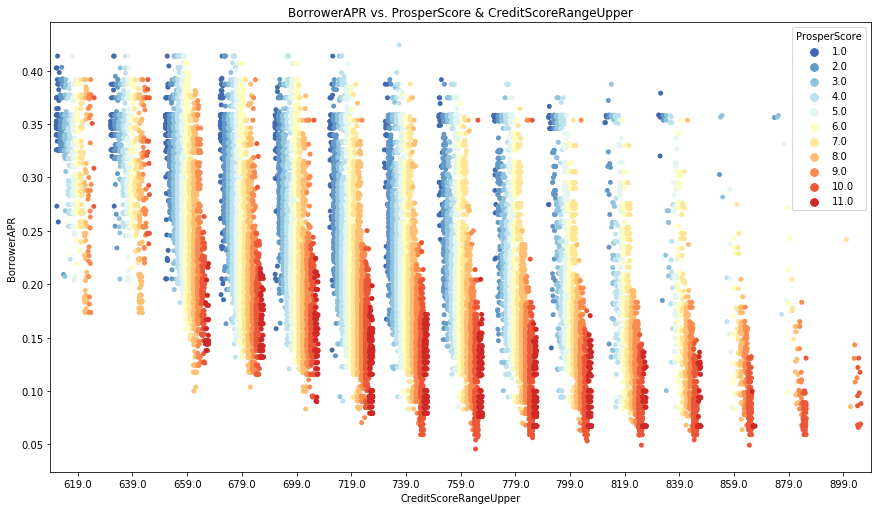

In [7]:
plt.figure(figsize = [14.7, 8.27]) 
sb.stripplot(data = df2, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', hue ='ProsperScore', jitter = 0.35 , dodge = True , palette ="RdYlBu_r")
plt.title('BorrowerAPR vs. ProsperScore & CreditScoreRangeUpper')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerAPR');

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle.tpl
